### Logistic Regression - Binary Classification

What patterns can be revealed in employee turnover?
How long does it take to hire employees?
What amount of investment is needed to get employees up to a fully productive speed?
Which of our employees are most likely to leave within the year?
Are learning and development initiatives having an impact on employee performance?

 Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#importing custom functions file
from src.functions import plot_hist

Loading the Data 

In [9]:
data = pd.read_csv('./data/HR_comma_sep.csv')
data.head()
#first 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


IDA- Initial Data analysis

In [4]:
print("Number of rows", data.shape[0])
print("Number of cols", data.shape[1])

number of rows 14999
number of cols 10


Descriptive Statistics

In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Explanation: 

1. Count: We can observe that the count of all the numerical columns is equal to the number of rows which indicates that the data with numerical columns have no missing values.
2. Mean: We can observe that the mean of promotion in last 5 years is very less indicating that there are many people with no promotion in 5 years, but on the same point the time spend in company is less than 4 years on an average which can be one of the reason for promotion less. 
3. Standard Deviation: In average monthly hours there is a large standard deviation, also the range of max and min value is large indicating that there is diversity in this column 
4. Min & Max: The max value of average monthly hours could also be an outlier also it can be possible with the min value. 
5. 50%: This shows the median value or 50% of data is below this value. In satisfaction level around 50% data values are below 65%. 


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Explanation:

1. All columns are non-null.
2. In this dataset there are two categorical columns: Department and Salary and other 8 columns are continuos on the basis of their data types.
3. Two Numerical columns have data type Float and other has int 

In [ ]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Cleaning Data

In [11]:
#checking null
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no null values present in the dataset

In [5]:
#duplicates present in the dataset
data.duplicated().sum()

3008

There are many duplicate values, thus we will remove them.

In [6]:
#dropping duplicates
data.drop_duplicates(inplace=True)

EDA - Exploratory Data Analysis 

c:\Users\Asus\envs\test\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\envs\test\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Asus\envs\test\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\envs\test\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

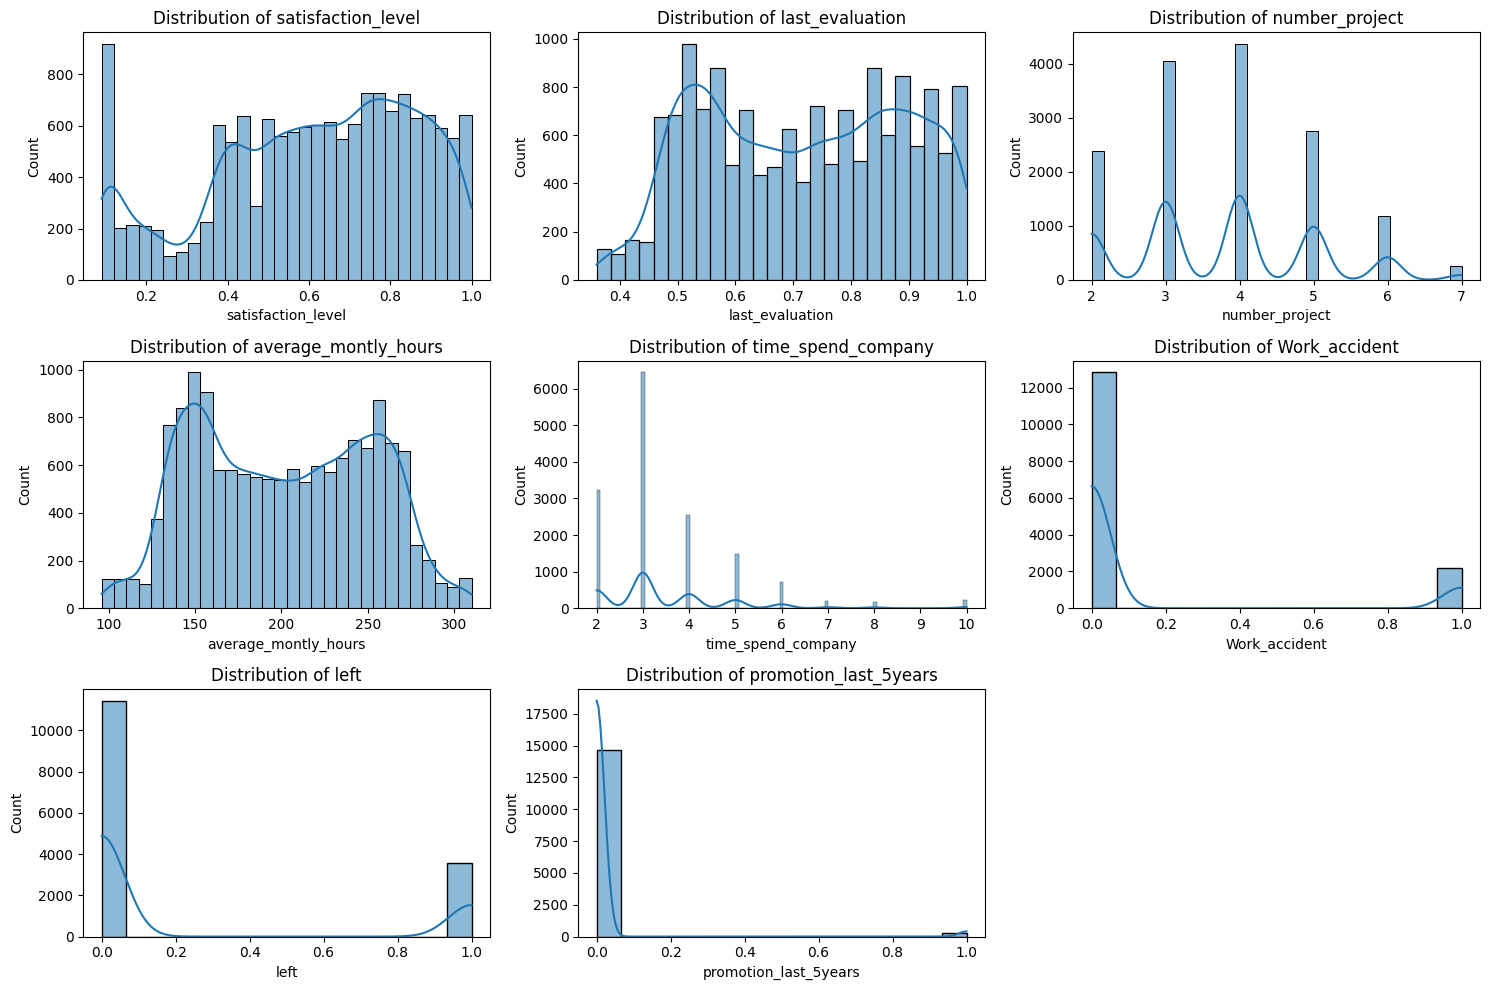

In [58]:
plot_hist(df= data)

Explanation

1. Data seems to be equally distributed in every column 

Outlier Detection

Feature Engineering - Chi Square Test

### Machine Learning - Logistic Regression

Train-Test Split

BaseEstimator 

Model Traning

Confusion Matrix

Model Testing

Training vs Testing Viz

Model Evaluation 

Predicted vs True

Conclusion